# Labsheet: Topics 8-10

### Part 1: Linear Regression

In [70]:
graphics_toolkit ("gnuplot");

x = load('datasets/ex1x.dat'); # age
y = load('datasets/ex1y.dat'); # height

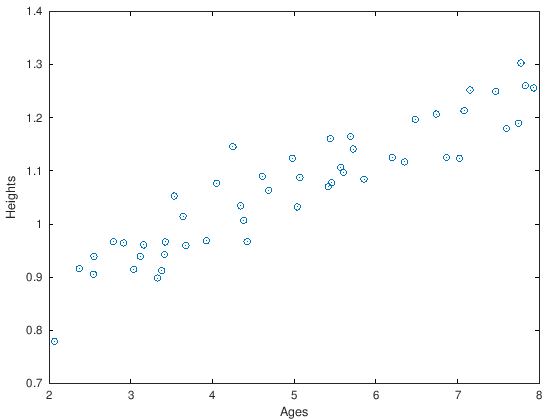

In [71]:
figure
plot (x, y, 'o');
ylabel ('Heights');
xlabel ('Ages');

In [72]:
m = length(y); % store the number of training examples
X = [ones(m, 1), x]; % Add a column of ones to x

In [73]:
theta = zeros(2, 1);
disp(theta)

   0
   0


In [74]:
iterations = 150;
alpha = 0.07;

In [75]:
function J = computeCost(X, y, theta)
    m = length(y);

    J = 0;


    predictions = X*theta;
    sqrErrors   = (predictions - y).^2;

    J = 1/(2*m) * sum(sqrErrors);
end

## (a) Implement Gradient Descent

In [76]:
function [theta, J_history, iterationcount] = gradientDescent(X , y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    iterationcount=zeros(num_iters, 1);
    
    for iter = 1:num_iters
        x = X (:,2);
    
        h = theta(1) + (theta(2)*x);

        theta_zero = theta(1) - alpha * (1/m) * sum(h-y);
        theta_one  = theta(2) - alpha * (1/m) * sum((h - y) .* x);

        theta = [theta_zero; theta_one];
        J_history(iter)= computeCost(X, y, theta);
        iterationcount(iter)=iter;
    end
end

## (b) Continue running gradient descent for more iterations until θ converges

   0.5116
   0.1064


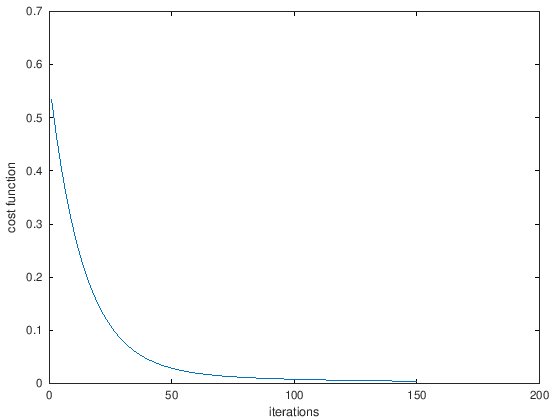

In [77]:
[theta, cost, count] = gradientDescent(X , y, theta, alpha, iterations);

figure
plot(count, cost);
ylabel("cost function");
xlabel("iterations");
disp(theta);

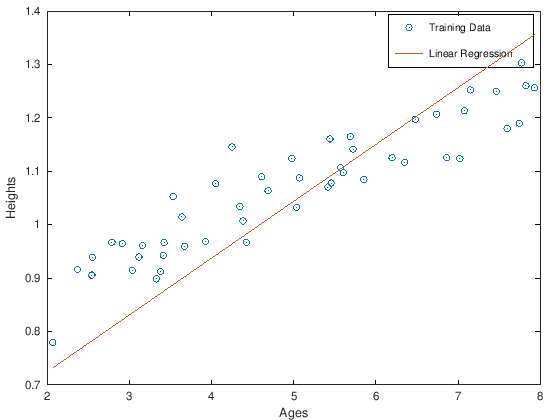

In [78]:
figure
plot(x, y, 'o');
ylabel('Heights');
xlabel('Ages');

hold on
plot(X(:, 2), X * theta, '-');
legend("Training Data", "Linear Regression");

## (c) Use the model to predict the height for two boys of aged 3.5 and 7.

`y = mx + c`

In [96]:
# when age = 3.5
age_1 = 3.5;
predicted_height_1 = (age_1 * theta(2)) + theta(1);

sprintf("Predicted Height for boy aged %i is %i", age_1, predicted_height_1)

ans = Predicted Height for boy aged 3.5 is 0.884093


In [98]:
# when age = 7.0
age_2 = 7.0;
predicted_height_2 = (age_2 * theta(2)) + theta(1);

sprintf("Predicted Height for boy aged %i is %i", age_2, predicted_height_2)

ans = Predicted Height for boy aged 7 is 1.25654


# Part 2: Understanding J(θ)